<a href="https://colab.research.google.com/github/bommojuvishu/stocksgraphcomp/blob/main/stock_graph_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Comparing the stocks that are max linear graphs**

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf
import numpy as np
import datetime as dt
import pandas as pd
import datetime
import os
import traceback
import matplotlib.pyplot as plt
import json
import logging 



In [ ]:
def min_max(data):
  max_x = max(data)
  min_x = min(data)
  result = []
  for x in data:
    x = x - min_x
    result.append(x/ (max_x - min_x))
    
  return result

def plotgraph(df , name):
  
  plt.figure(figsize=(9,4))
  plt.plot(df.index, df['minmax'])
  # best fit in orange
  plt.plot(df.index, df['expected'])
  plt.title(name)
  plt.show


def createList(df):
  # interval = 1/(len(df))
  # result =np.arange(0, 1, interval)

  # if len(result) != len(df):
  #   lastElementIndex = len(result)-1
  #   result = result[:lastElementIndex]

  # return result
  return np.linspace(0,1,len(df))

def computeCloud (data):
    if data.Close > data.MovingAVG:
        return 1
    
    return 0

def returnpercent(arr , nodays ):
  result ={}
  # TODAY = dt.datetime.today().strftime('%Y-%m-%d')
  datetime_object = dt.datetime.strptime(TODAY_rtrpercent, '%Y-%m-%d')
  for name in arr:
    ohlcv = yf.download(name +'.NS',datetime_object -dt.timedelta(nodays),datetime_object)
    openprice = ohlcv.iloc[0]['Open']
    closeprice = ohlcv.iloc[len(ohlcv) -1 ]['Close']
    x = closeprice -openprice
    perrtr = (x/openprice) *100
    result[name] = perrtr
  print(result)

  return sum(result.values()) ,ohlcv

def graphfit(ohclv):  
  x_data =x_values = np.linspace(0,1,len(ohlcv))

  y_data =ohlcv['Close'].to_numpy()

  ylog_data = np.log(y_data)

  curve_fit = np.polyfit(x_data, ylog_data, 1)
  a , b  =curve_fit

  y = np.exp(b) * np.exp(a*x_data)
  scaled_y =  min_max(y)
  return scaled_y
  # plt.plot(x_data, y_data)

  # # best fit in orange
  # plt.plot(x_data, y)

In [ ]:
#nifty 50
liststocks =["HINDALCO","JSWSTEEL","CIPLA","INFY","TATASTEEL","NESTLEIND","APOLLOHOSP","DRREDDY","DIVISLAB","WIPRO","ULTRACEMCO","SUNPHARMA","ASIANPAINT","HCLTECH","TECHM","ADANIPORTS","LT","UPL","ITC","BAJFINANCE","TCS","HDFCBANK","ONGC","TATAMOTORS","GRASIM","HEROMOTOCO","EICHERMOT","BAJAJFINSV","BPCL","HINDUNILVR","INDUSINDBK","HDFCLIFE","AXISBANK","M&M","HDFC","ICICIBANK","BAJAJ-AUTO","BRITANNIA","SHREECEM","TITAN","POWERGRID","SBILIFE","KOTAKBANK","BHARTIARTL","MARUTI","RELIANCE","SBIN","COALINDIA","NTPC","TATACONSUM"]

In [ ]:
#nifty 500
liststocks = ["3MINDIA","ABB","ACC","AIAENG","APLAPOLLO","AUBANK","AARTIDRUGS","AARTIIND","AAVAS","ABBOTINDIA","ADANIENT","ADANIGREEN","ADANIPORTS","ATGL","ADANITRANS","ABCAPITAL","ABFRL","ADVENZYMES","AEGISCHEM","AFFLE","AJANTPHARM","ALEMBICLTD","APLLTD","ALKEM","ALKYLAMINE","ALOKINDS","AMARAJABAT","AMBER","AMBUJACEM","ANGELONE","ANURAS","APOLLOHOSP","APOLLOTYRE","ASAHIINDIA","ASHOKLEY","ASHOKA","ASIANPAINT","ASTERDM","ASTRAZEN","ASTRAL","ATUL","AUROPHARMA","AVANTIFEED","DMART","AXISBANK","BASF","BEML","BSE","BAJAJ-AUTO","BAJAJCON","BAJAJELEC","BAJFINANCE","BAJAJFINSV","BAJAJHLDNG","BALAMINES","BALKRISIND","BALRAMCHIN","BANDHANBNK","BANKBARODA","BANKINDIA","MAHABANK","BATAINDIA","BAYERCROP","BERGEPAINT","BDL","BEL","BHARATFORG","BHEL","BPCL","BHARATRAS","BHARTIARTL","BIOCON","BIRLACORPN","BSOFT","BLUEDART","BLUESTARCO","BBTC","BOSCHLTD","BRIGADE","BRITANNIA","CCL","CESC","CGPOWER","CRISIL","CSBBANK","CADILAHC","CANFINHOME","CANBK","CAPLIPOINT","CGCL","CARBORUNIV","CASTROLIND","CEATLTD","CENTRALBK","CDSL","CENTURYPLY","CENTURYTEX","CERA","CHALET","CHAMBLFERT","CHOLAHLDNG","CHOLAFIN","CIPLA","CUB","COALINDIA","COCHINSHIP","COFORGE","COLPAL","CAMS","CONCOR","COROMANDEL","CREDITACC","CROMPTON","CUMMINSIND","CYIENT","DCBBANK","DCMSHRIRAM","DLF","DABUR","DALBHARAT","DEEPAKNTR","DELTACORP","DHANI","DHANUKA","DBL","DIVISLAB","DIXON","LALPATHLAB","DRREDDY","EIDPARRY","EIHOTEL","EPL","EDELWEISS","EICHERMOT","ELGIEQUIP","EMAMILTD","ENDURANCE","ENGINERSIN","EQUITAS","EQUITASBNK","ERIS","ESCORTS","EXIDEIND","FDC","FEDERALBNK","FACT","FINEORG","FINCABLES","FINPIPE","FSL","FORTIS","FRETAIL","GAIL","GMMPFAUDLR","GALAXYSURF","GARFIBRES","GICRE","GILLETTE","GLAND","GLAXO","GLENMARK","GODFRYPHLP","GODREJAGRO","GODREJCP","GODREJIND","GODREJPROP","GRANULES","GRAPHITE","GRASIM","GESHIP","GREAVESCOT","GRINDWELL","GUJALKALI","GAEL","FLUOROCHEM","GUJGASLTD","GNFC","GPPL","GSFC","GSPL","HEG","HCLTECH","HDFCAMC","HDFCBANK","HDFCLIFE","HFCL","HAPPSTMNDS","HATHWAY","HATSUN","HAVELLS","HEIDELBERG","HEMIPROP","HEROMOTOCO","HIKAL","HINDALCO","HGS","HAL","HINDCOPPER","HINDPETRO","HINDUNILVR","HINDZINC","POWERINDIA","HOMEFIRST","HONAUT","HUDCO","HDFC","ICICIBANK","ICICIGI","ICICIPRULI","ISEC","IDBI","IDFCFIRSTB","IDFC","IFBIND","IIFL","IIFLWAM","IOLCP","IRB","IRCON","ITC","ITI","INDIACEM","IBULHSGFIN","IBREALEST","INDIAMART","INDIANB","IEX","INDHOTEL","IOC","IOB","IRCTC","IRFC","INDIGOPNTS","ICIL","INDOCO","IGL","INDUSTOWER","INDUSINDBK","INFIBEAM","NAUKRI","INFY","INGERRAND","INOXLEISUR","INTELLECT","INDIGO","IPCALAB","JBCHEPHARM","JKCEMENT","JKLAKSHMI","JKPAPER","JKTYRE","JMFINANCIL","JSWENERGY","JSWSTEEL","JAMNAAUTO","JINDALSAW","JSLHISAR","JSL","JINDALSTEL","JCHAC","JUBLFOOD","JUBLINGREA","JUBLPHARMA","JUSTDIAL","JYOTHYLAB","KPRMILL","KEI","KNRCON","KPITTECH","KRBL","KSB","KAJARIACER","KALPATPOWR","KALYANKJIL","KANSAINER","KARURVYSYA","KSCL","KEC","KOTAKBANK","L&TFH","LTTS","LICHSGFIN","LAOPALA","LAXMIMACH","LTI","LT","LAURUSLABS","LXCHEM","LEMONTREE","LINDEINDIA","LUPIN","LUXIND","MMTC","MOIL","MRF","LODHA","MGL","M&MFIN","M&M","MAHINDCIE","MHRIL","MAHLOG","MANAPPURAM","MRPL","MARICO","MARUTI","MASTEK","MFSL","MAXHEALTH","MAZDOCK","METROPOLIS","MINDTREE","MINDACORP","MINDAIND","MIDHANI","MOTILALOFS","MPHASIS","MCX","MUTHOOTFIN","NATCOPHARM","NBCC","NCC","NESCO","NHPC","NLCINDIA","NMDC","NOCIL","NTPC","NH","NATIONALUM","NFL","NAVINFLUOR","NAZARA","NESTLEIND","NETWORK18","NILKAMAL","NAM-INDIA","OBEROIRLTY","ONGC","OIL","OFSS","ORIENTELEC","PCBL","PIIND","PNBHOUSING","PNCINFRA","PVR","PAGEIND","PERSISTENT","PETRONET","PFIZER","PHOENIXLTD","PIDILITIND","PEL","POLYMED","POLYCAB","POLYPLEX","POONAWALLA","PFC","POWERGRID","PRAJIND","PRESTIGE","PRINCEPIPE","PRSMJOHNSN","PGHL","PGHH","PNB","QUESS","RBLBANK","RECLTD","RHIM","RITES","RADICO","RVNL","RAILTEL","RAIN","RAJESHEXPO","RALLIS","RCF","RATNAMANI","REDINGTON","RELAXO","RELIANCE","RBA","ROSSARI","ROUTE","SBICARD","SBILIFE","SIS","SJVN","SKFINDIA","SRF","SANOFI","SCHAEFFLER","SCHNEIDER","SEQUENT","SHARDACROP","SFL","SHILPAMED","SCI","SHREECEM","SHRIRAMCIT","SRTRANSFIN","SIEMENS","SOBHA","SOLARINDS","SOLARA","SONACOMS","SONATSOFTW","SPANDANA","SPICEJET","STARCEMENT","SBIN","SAIL","SWSOLAR","STLTECH","STAR","SUDARSCHEM","SUMICHEM","SPARC","SUNPHARMA","SUNTV","SUNDARMFIN","SUNDRMFAST","SUNTECK","SUPRAJIT","SUPREMEIND","SUPPETRO","SUVENPHAR","SUZLON","SYMPHONY","SYNGENE","TCIEXP","TCNSBRANDS","TTKPRESTIG","TV18BRDCST","TVSMOTOR","TANLA","TASTYBITE","TATACHEM","TATACOFFEE","TATACOMM","TCS","TATACONSUM","TATAELXSI","TATAMTRDVR","TATAMOTORS","TATAPOWER","TATASTLLP","TATASTEEL","TTML","TEAMLEASE","TECHM","NIACL","RAMCOCEM","THERMAX","THYROCARE","TIMKEN","TITAN","TORNTPHARM","TORNTPOWER","TRENT","TRIDENT","TRITURBINE","TIINDIA","UCOBANK","UFLEX","UPL","UTIAMC","UJJIVAN","UJJIVANSFB","ULTRACEMCO","UNIONBANK","UBL","MCDOWELL-N","VGUARD","VMART","VIPIND","VAIBHAVGBL","VAKRANGEE","VALIANTORG","VTL","VARROC","VBL","VEDL","VENKEYS","VINATIORGA","IDEA","VOLTAS","WABCOINDIA","WELCORP","WELSPUNIND","WESTLIFE","WHIRLPOOL","WIPRO","WOCKPHARMA","YESBANK","ZEEL","ZENSARTECH","ZYDUSWELL","ECLERX"]

In [ ]:
# liststocks = ['PERSISTENT','INFY','M&M','VBL']
tickers={}

daterange = 30
TODAY_rtrpercent = "2022-02-01"
periodinput = 365
TODAY = "2022-01-01"
TODAY = dt.datetime.today().strftime('%Y-%m-%d')
datetime_object = dt.datetime.strptime(TODAY, '%Y-%m-%d')

count=0
for name in liststocks: 
    try:
        finalresult = []
        count = count +1
        i=0
        flag =False
        print(count,name)
        ohlcv = yf.download(name +'.NS',datetime_object -dt.timedelta(periodinput),datetime_object)
    
        ohlcv['minmax']=min_max(ohlcv['Close'].values)
        print("LENGTH:",len(ohlcv))
        ohlcv['expected'] = graphfit(ohlcv)
        # ohlcv['result'] = ohlcv.apply(lambda x: (x['expected'] - x['minmax']) if x['expected'] > x['minmax']  else 0 , axis=1)
        ohlcv['result'] = ohlcv.apply(lambda x: (x['expected'] - x['minmax']) , axis=1)
        ohlcv['result'] = ohlcv['result'].abs()

        if ohlcv['expected'].values[0] == 1:
          flag=True

        finalresult.append(sum(ohlcv['result']))
   
        if flag:
          tickers[name] = [100000]
        else:
          tickers[name] = finalresult
    
    except Exception as ex:
        print(ex)#raised if `y` is empty.
        print("ERROR: ", name)
        liststocks.remove(name)
        traceback.print_exc()
        

df=pd.DataFrame.from_dict(tickers,orient='index')
df = df.reset_index()
df

1 3MINDIA
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
2 ABB
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
3 ACC
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
4 AIAENG
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
5 APLAPOLLO
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
6 AUBANK
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
7 AARTIDRUGS
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
8 AARTIIND
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
9 AAVAS
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
10 ABBOTINDIA
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
11 ADANIENT
[*********************100%***********************]

Traceback (most recent call last):
  File "<ipython-input-6-0ba6876118d8>", line 21, in <module>
    ohlcv['minmax']=min_max(ohlcv['Close'].values)
  File "<ipython-input-3-236d2f986553>", line 2, in min_max
    max_x = max(data)
ValueError: max() arg is an empty sequence



[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
89 CGCL
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
90 CARBORUNIV
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
91 CASTROLIND
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
92 CEATLTD
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
93 CENTRALBK
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
94 CDSL
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
95 CENTURYPLY
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
96 CENTURYTEX
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
97 CERA
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
98 CHALET
[*********************100%*******************

Traceback (most recent call last):
  File "<ipython-input-6-0ba6876118d8>", line 21, in <module>
    ohlcv['minmax']=min_max(ohlcv['Close'].values)
  File "<ipython-input-3-236d2f986553>", line 2, in min_max
    max_x = max(data)
ValueError: max() arg is an empty sequence


[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
430 SYNGENE
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
431 TCIEXP
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
432 TCNSBRANDS
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
433 TTKPRESTIG
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
434 TV18BRDCST
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
435 TVSMOTOR
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
436 TANLA
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
437 TASTYBITE
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
438 TATACHEM
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
439 TATACOFFEE
[*********************100%*

Traceback (most recent call last):
  File "<ipython-input-6-0ba6876118d8>", line 21, in <module>
    ohlcv['minmax']=min_max(ohlcv['Close'].values)
  File "<ipython-input-3-236d2f986553>", line 2, in min_max
    max_x = max(data)
ValueError: max() arg is an empty sequence


[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
491 WHIRLPOOL
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
492 WIPRO
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
493 WOCKPHARMA
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
494 YESBANK
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
495 ZEEL
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
496 ZENSARTECH
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
497 ZYDUSWELL
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248
498 ECLERX
[*********************100%***********************]  1 of 1 completed
MATCH: 248 248


,index,0
0,3MINDIA,58.186568
1,ABB,20.989985
2,ACC,26.554473
3,AIAENG,100000.000000
4,APLAPOLLO,22.686869
...,...,...
490,YESBANK,100000.000000
491,ZEEL,45.580257
492,ZENSARTECH,25.041657
493,ZYDUSWELL,55.662006


In [ ]:
df.sort_values(by=[0])

,index,0
346,PERSISTENT,7.478626
405,SONACOMS,11.654748
370,RADICO,13.988088
388,SKFINDIA,14.135914
169,GRINDWELL,14.361535
...,...,...
103,COCHINSHIP,100000.000000
105,COLPAL,100000.000000
218,ITI,100000.000000
48,BAJAJ-AUTO,100000.000000


[*********************100%***********************]  1 of 1 completed
PERSISTENT
[*********************100%***********************]  1 of 1 completed
SONACOMS
[*********************100%***********************]  1 of 1 completed
RADICO
[*********************100%***********************]  1 of 1 completed
SKFINDIA
[*********************100%***********************]  1 of 1 completed
GRINDWELL
[*********************100%***********************]  1 of 1 completed
CARBORUNIV
[*********************100%***********************]  1 of 1 completed
KPRMILL
[*********************100%***********************]  1 of 1 completed
LODHA
[*********************100%***********************]  1 of 1 completed
IEX
[*********************100%***********************]  1 of 1 completed
VTL
[*********************100%***********************]  1 of 1 completed
POWERINDIA
[*********************100%***********************]  1 of 1 completed
MAXHEALTH
[*********************100%***********************]  1 of 1 completed
JAM

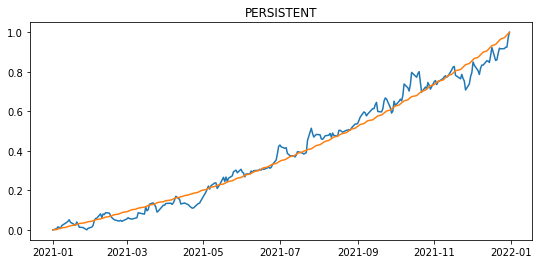

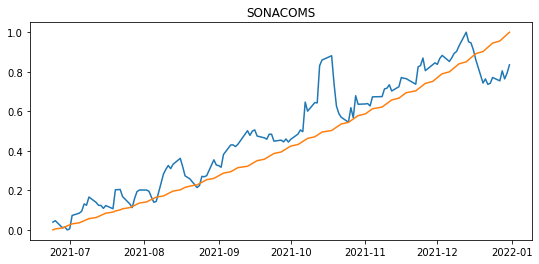

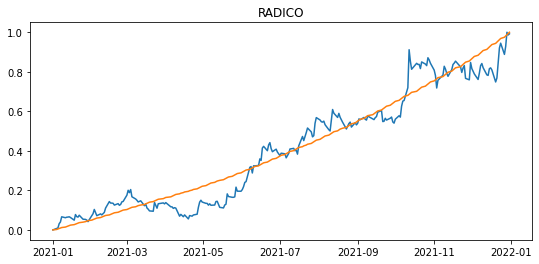

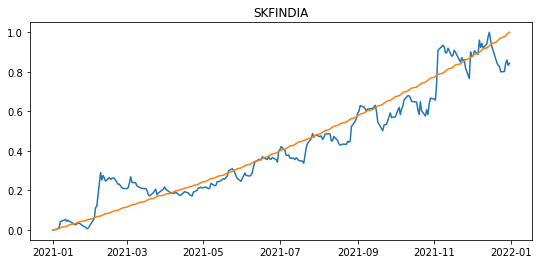

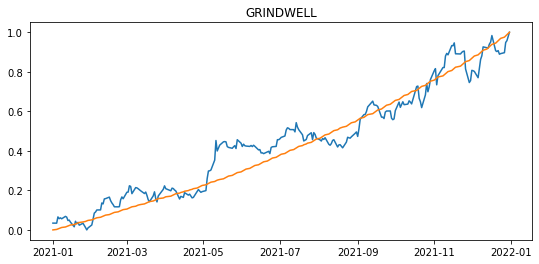

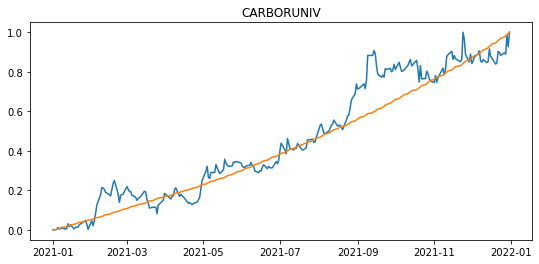

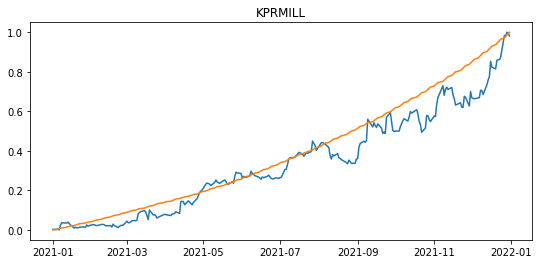

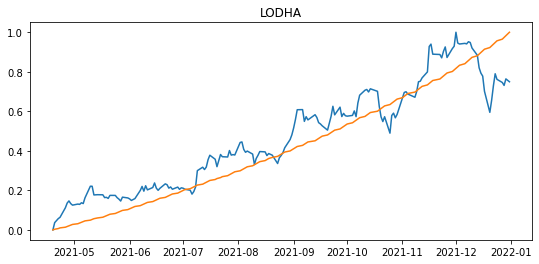

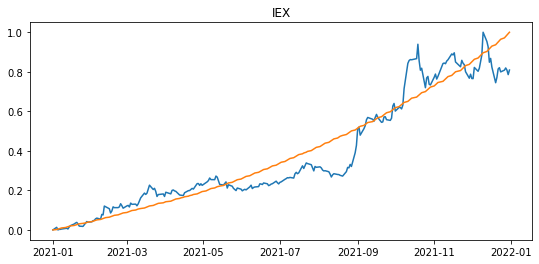

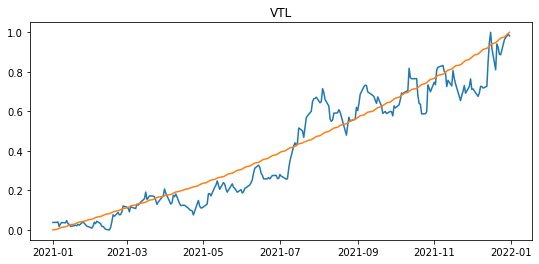

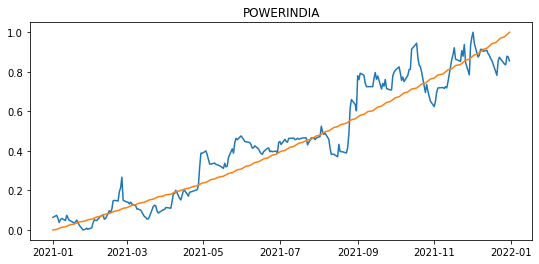

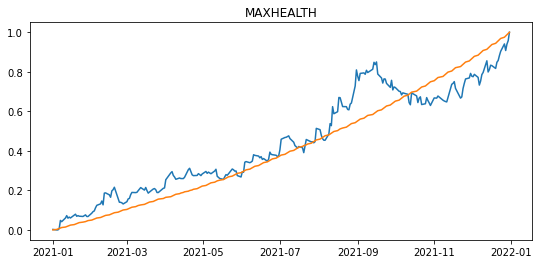

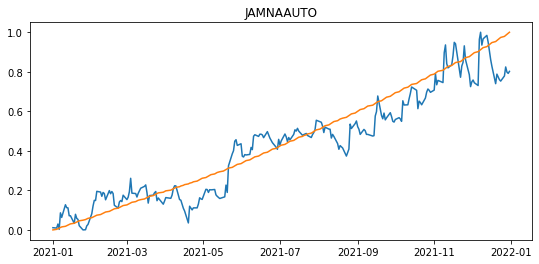

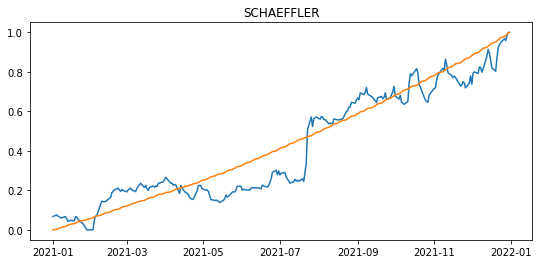

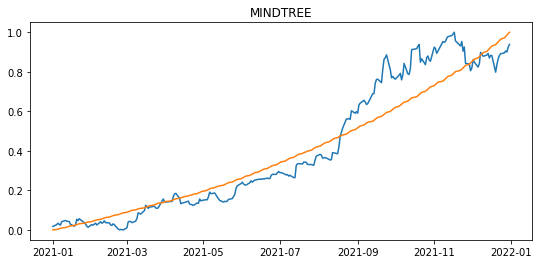

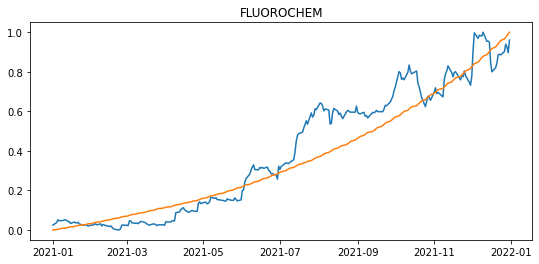

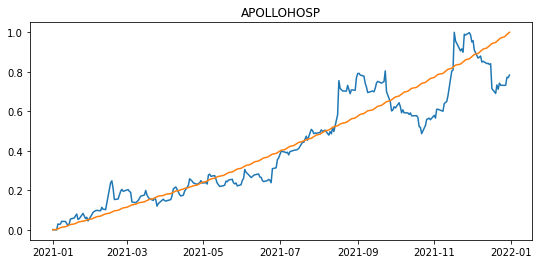

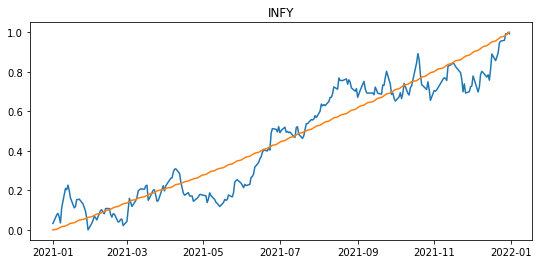

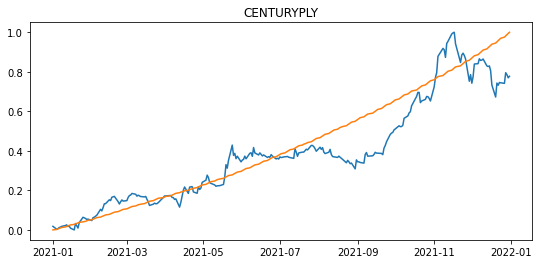

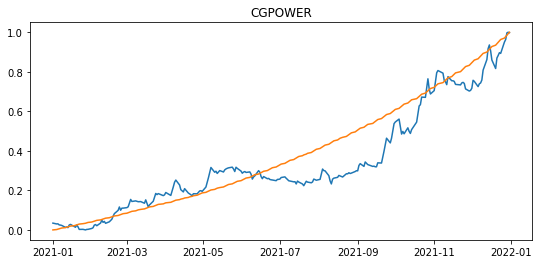

In [ ]:
top10 = df.sort_values(by=[0]).head(20)
topnames = top10['index'].values
# topnames=['VBL','ATGL']
for name in topnames: 
    try:
          
        ohlcv = yf.download(name +'.NS',datetime_object -dt.timedelta(periodinput),datetime_object)
        ohlcv['minmax']=min_max(ohlcv['Close'].values)
        
        ohlcv['expected'] =  graphfit(ohlcv)

        ohlcv['result'] = ohlcv.apply(lambda x: (x['minmax'] - x['expected'] ) , axis=1)
        
        print(name) 
        colname = 'Close'
        plotgraph(ohlcv, name)
        # colname = 'expected'
        # plotgraph(ohlcv, colname)
        
        
    
    except Exception as ex:
        print(ex)#raised if  is empty.
        print("ERROR: ", name)
   
        traceback.print_exc()

In [ ]:
print(topnames)
returnpercent(topnames, daterange)

['PERSISTENT' 'SONACOMS' 'RADICO' 'SKFINDIA' 'GRINDWELL' 'CARBORUNIV'
 'KPRMILL' 'LODHA' 'IEX' 'VTL' 'POWERINDIA' 'MAXHEALTH' 'JAMNAAUTO'
 'SCHAEFFLER' 'MINDTREE' 'FLUOROCHEM' 'APOLLOHOSP' 'INFY' 'CENTURYPLY'
 'CGPOWER']
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*******************

(-79.79406454814261,
                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2022-01-03  196.000000  198.800003  195.100006  196.100006  196.100006   
 2022-01-04  197.000000  205.899994  197.000000  204.600006  204.600006   
 2022-01-05  206.000000  208.899994  202.000000  202.750000  202.750000   
 2022-01-06  202.050003  204.500000  195.649994  197.899994  197.899994   
 2022-01-07  199.100006  205.600006  198.149994  199.350006  199.350006   
 2022-01-10  201.500000  203.050003  190.199997  196.149994  196.149994   
 2022-01-11  193.000000  195.600006  191.000000  192.300003  192.300003   
 2022-01-12  194.000000  194.250000  184.199997  187.649994  187.649994   
 2022-01-13  189.000000  190.000000  184.199997  185.750000  185.750000   
 2022-01-14  188.000000  190.000000  186.100006  187.850006  187.850006   
 2022-01-17  187.500000  189.850006  184.850006  185.750000  185.750000   
 202

In [ ]:
ohlcv

,Open,High,Low,Close,Adj Close,Volume,minmax,expected,result
Date,,,,,,,,,
2021-01-01,45.400002,45.500000,44.349998,44.650002,44.650002,1779701,0.034383,0.000000,0.034383
2021-01-04,44.750000,45.549999,43.599998,44.000000,44.000000,2286553,0.030206,0.001893,0.028313
2021-01-05,43.049999,44.750000,43.049999,44.099998,44.099998,2746881,0.030848,0.003796,0.027052
2021-01-06,44.299999,44.599998,43.049999,43.250000,43.250000,2089386,0.025386,0.005710,0.019676
2021-01-07,43.549999,44.500000,42.900002,43.099998,43.099998,2063753,0.024422,0.007634,0.016787
...,...,...,...,...,...,...,...,...,...
2021-12-27,180.000000,187.149994,174.500000,187.149994,187.149994,926143,0.950193,0.970562,-0.020369
2021-12-28,194.000000,194.000000,186.100006,189.199997,189.199997,939497,0.963368,0.977861,-0.014493
2021-12-29,190.899994,197.000000,185.000000,194.449997,194.449997,1532490,0.997108,0.985199,0.011909
